

# Exploring the fit bit kaggle dataset 

This notebook aims to explore and analyze the Fitbit dataset. The dataset contains various CSV files with information on daily activities, calories burned, heart rate, sleep patterns, and more. We will start by listing the directory structure of the dataset, then proceed to load and inspect some key CSV files. Basic statistics and visualizations will be generated to understand the data better.

# Table of Contents

1. [Ask](#Ask)
   - [Accessing the Kaggle Dataset](#accessing-the-kaggle-dataset)
   - [Data Exploration](#data-exploration)
2. [Prepare](#prepare)
3. [Process](#process)
4. [Analyze](#analyze)
5. [Share](#share)
6. [Act](#act)


# Ask
[Back to Table of Contents](#table-of-contents)
## Accessing the Kaggle Dataset
[Back to Table of Contents](#table-of-contents)

This repository includes a GitHub Actions workflow that continuously tests the process of connecting to the Kaggle API, using github secrets to pass username and key securely as environment variables to the automated workflow, and then checks if the files are correctly downloaded and unzipped, if so, a CSV file is imported and printed using pandas.

In this research notebook we will use an analogue operation to gather the dataset, but instead of using secrets, the machine that runs this notebook looks for the kaggle.json file that should be in the .kaggle/ folder, to authenticate and download the file. (This file should be included in the .gitignore file, so it's not commited/shared).

We can make sure all libraries for this step are imported:


In [1]:
import os # to create the directory
import kaggle # To download the dataset
import zipfile # To extract the dataset

 

And can create the data directory that will hold the dataset: `../data/`, by using the `makedirs` function from the `os` module.



In [2]:
# Step 1: Ensure the data directory exists
data_dir = '../data/'
os.makedirs(data_dir, exist_ok=True)

Then, since in the `~/.kaggle/` folder we have saved our kaggle credentials (mine are not commited to this repository) the `kaggle.api.dataset_download_files` function uses it automatically to authenticate with the api. 

Once we define the dataset identifier as `dataset = 'arashnic/fitbit'` the function accesses to the dataset and downloads it: 

In [3]:
# Step 2: Use Kaggle API to download the dataset
dataset = 'arashnic/fitbit'  # The dataset identifier on Kaggle
kaggle.api.dataset_download_files(dataset, path=data_dir, unzip=False)

Dataset URL: https://www.kaggle.com/datasets/arashnic/fitbit


Once the file has been downloaded, It can be unzipped as follows:

* First the paths of where the file is and where it is going to be extracted are defined: 

In [4]:

zip_file_path = '../data/fitbit.zip'
extract_to_path = '../data/'

* Then, the zip ifle is extracted. 

In [5]:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

Now that we have successfully unzipped the files, we can take a look to what we are dealing with, by printing the structure of the files within the `../data/` folder:

In [6]:
# print the structure of the ../data/ directory

def print_directory_structure(root_dir, indent=''):
    for item in os.listdir(root_dir):
        item_path = os.path.join(root_dir, item)
        if os.path.isdir(item_path):
            print(f"{indent}📁 {item}/")
            print_directory_structure(item_path, indent + '    ')
        else:
            print(f"{indent}📄 {item}")

# Define the root directory
root_directory = '../data'

# Print the directory structure
print(f"Directory structure of {root_directory}:")
print_directory_structure(root_directory)


Directory structure of ../data:
📄 fitbit.zip
📁 mturkfitbit_export_4.12.16-5.12.16/
    📁 Fitabase Data 4.12.16-5.12.16/
        📄 minuteIntensitiesNarrow_merged.csv
        📄 minuteStepsWide_merged.csv
        📄 dailyActivity_merged.csv
        📄 hourlySteps_merged.csv
        📄 dailyIntensities_merged.csv
        📄 minuteCaloriesWide_merged.csv
        📄 hourlyCalories_merged.csv
        📄 minuteStepsNarrow_merged.csv
        📄 dailyCalories_merged.csv
        📄 minuteCaloriesNarrow_merged.csv
        📄 weightLogInfo_merged.csv
        📄 hourlyIntensities_merged.csv
        📄 dailySteps_merged.csv
        📄 minuteMETsNarrow_merged.csv
        📄 heartrate_seconds_merged.csv
        📄 minuteSleep_merged.csv
        📄 minuteIntensitiesWide_merged.csv
        📄 sleepDay_merged.csv
📁 mturkfitbit_export_3.12.16-4.11.16/
    📁 Fitabase Data 3.12.16-4.11.16/
        📄 minuteIntensitiesNarrow_merged.csv
        📄 dailyActivity_merged.csv
        📄 hourlySteps_merged.csv
        📄 hourlyCalorie

## Data Exploration

There are different kinds of data in these folder, one sample from march 12 to april 11 of 2016, and other from april 12 to may 12 of 2016. 








First few rows of ../data/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv:


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


Descriptive Statistics of ../data/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv:


,count,mean,min,25%,50%,75%,max,std,NaN Count
Id,940.0,4855407369.332978,1503960366.0,2320127002.0,4445114986.0,6962181067.0,8877689391.0,2424805475.65796,0
ActivityDate,940,2016-04-26 06:53:37.021276672,2016-04-12 00:00:00,2016-04-19 00:00:00,2016-04-26 00:00:00,2016-05-04 00:00:00,2016-05-12 00:00:00,NaN,0
TotalSteps,940.0,7637.910638,0.0,3789.75,7405.5,10727.0,36019.0,5087.150742,0
TotalDistance,940.0,5.489702,0.0,2.62,5.245,7.7125,28.030001,3.924606,0
TrackerDistance,940.0,5.475351,0.0,2.62,5.245,7.71,28.030001,3.907276,0
LoggedActivitiesDistance,940.0,0.108171,0.0,0.0,0.0,0.0,4.942142,0.619897,0
VeryActiveDistance,940.0,1.502681,0.0,0.0,0.21,2.0525,21.92,2.658941,0
ModeratelyActiveDistance,940.0,0.567543,0.0,0.0,0.24,0.8,6.48,0.88358,0
LightActiveDistance,940.0,3.340819,0.0,1.945,3.365,4.7825,10.71,2.040655,0
SedentaryActiveDistance,940.0,0.001606,0.0,0.0,0.0,0.0,0.11,0.007346,0


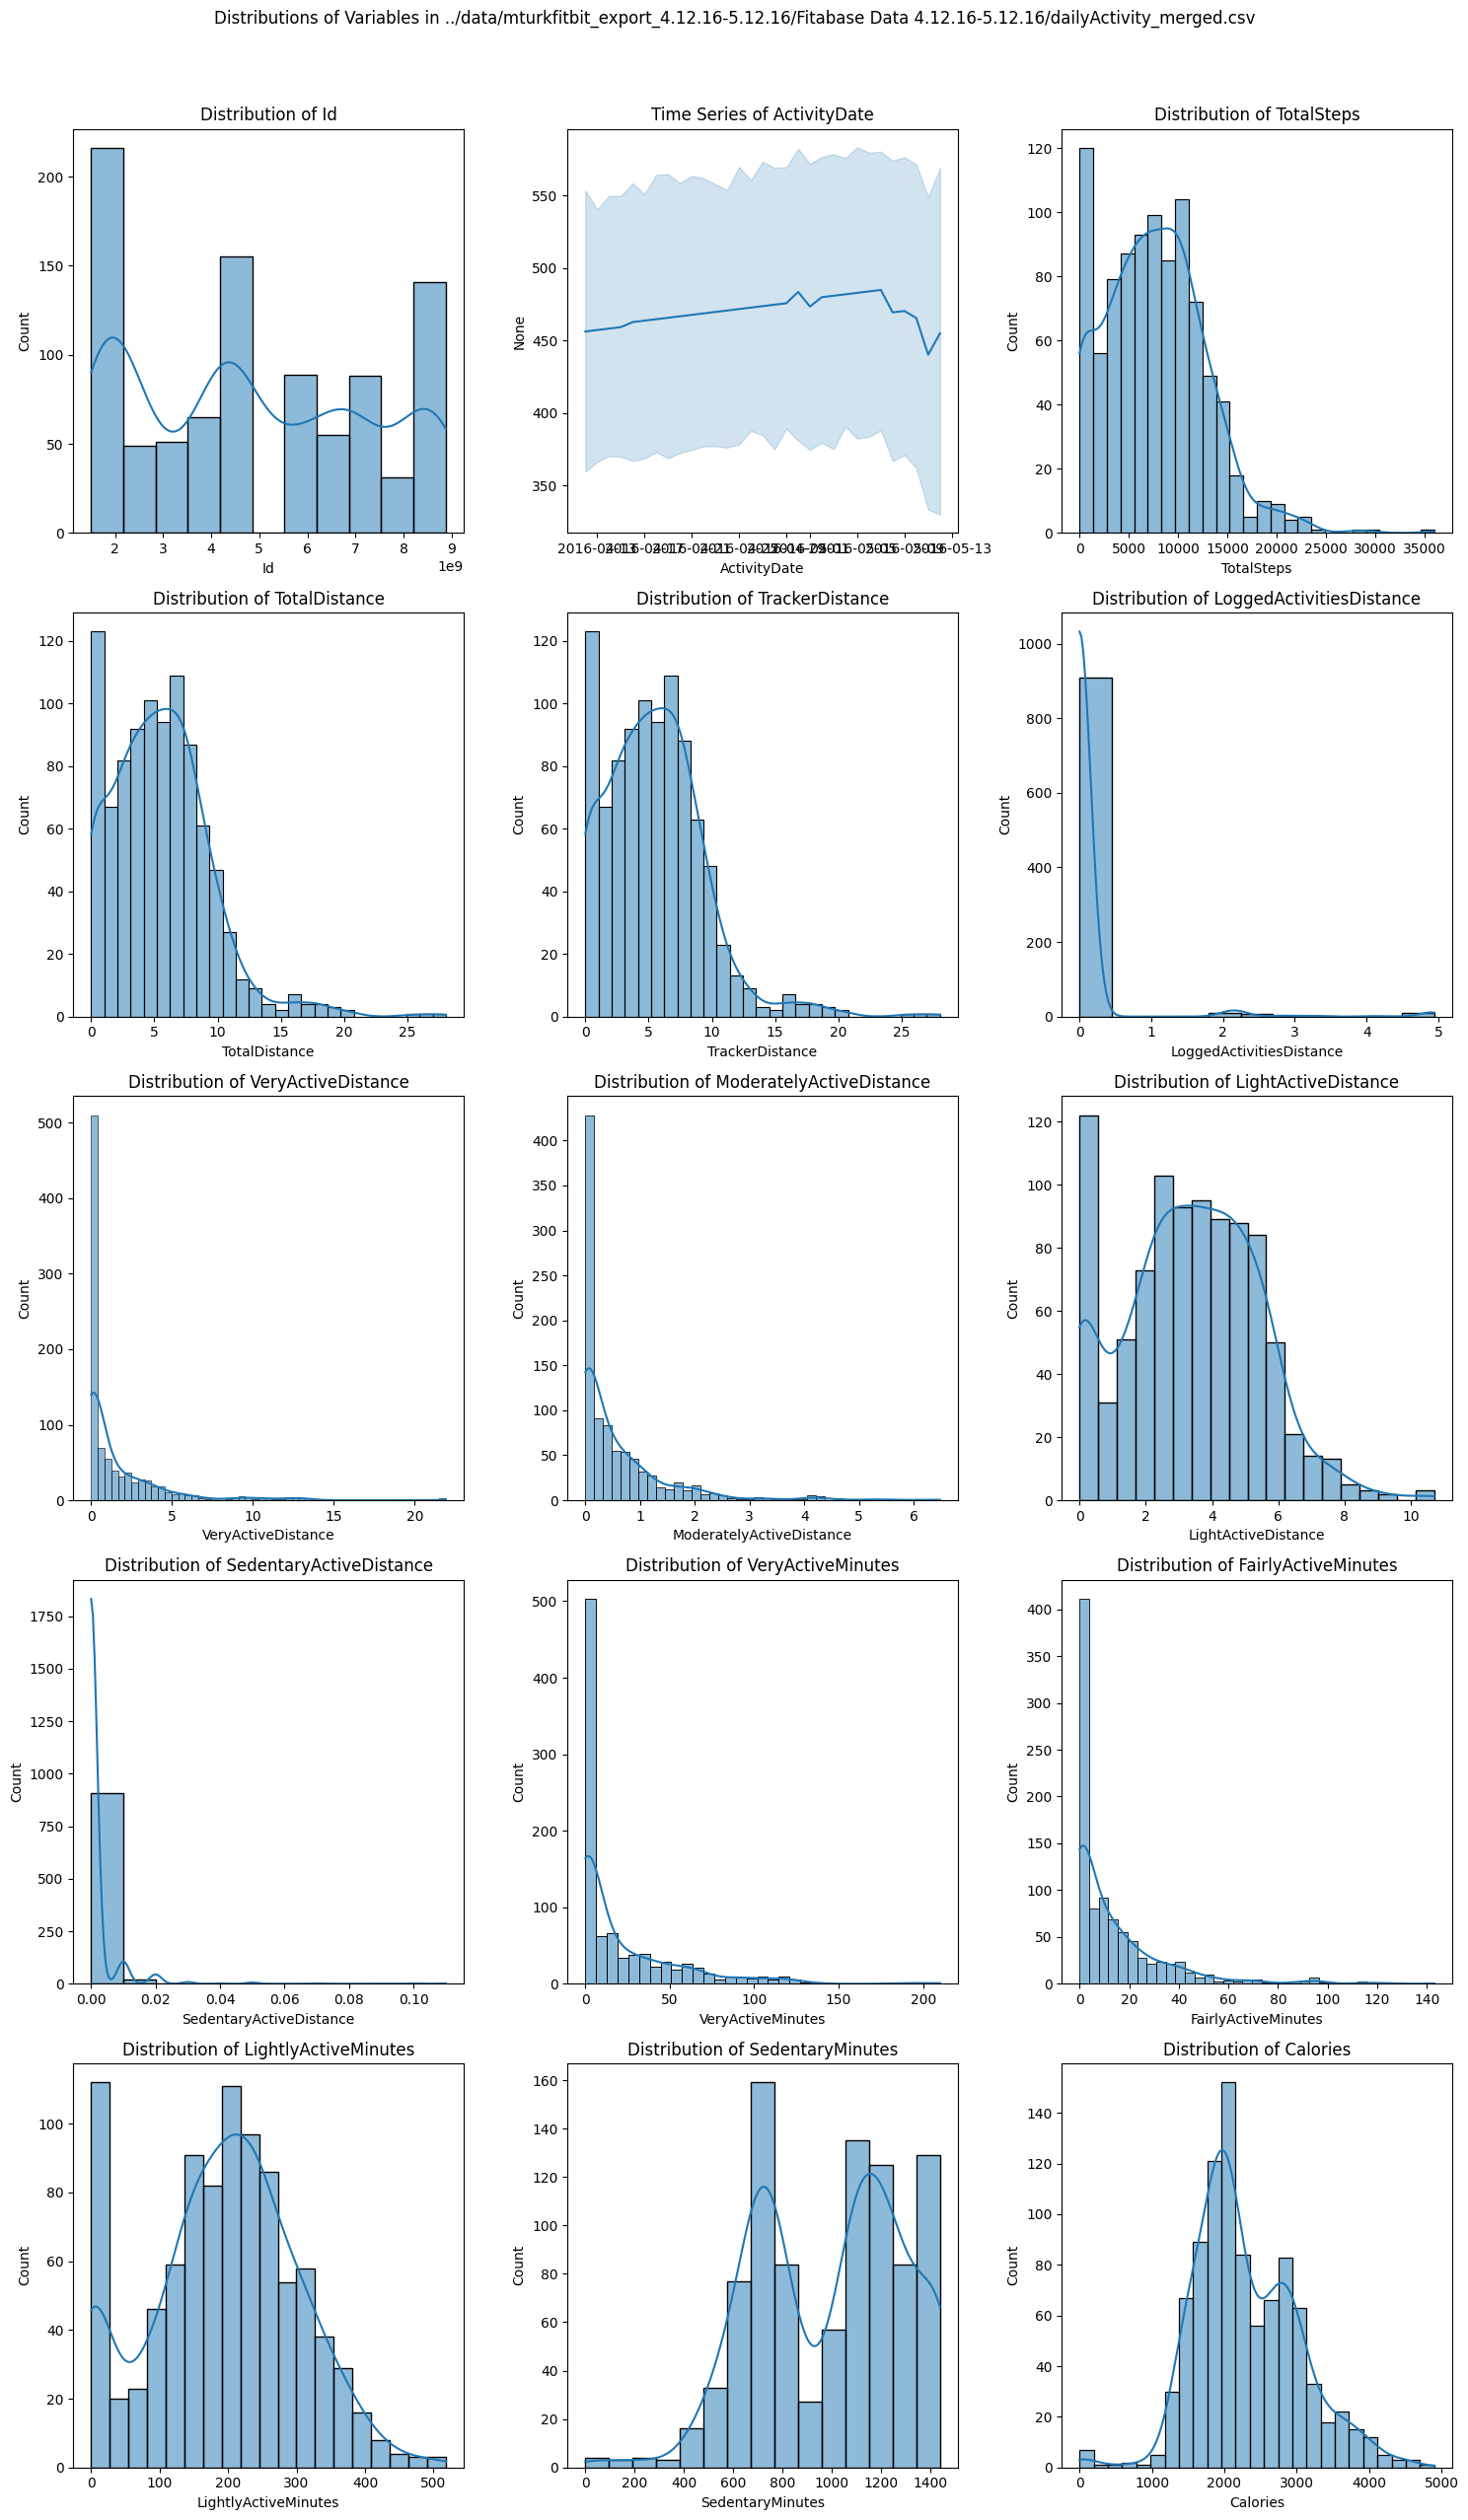

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# defining file path
filepath = '../data/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv'  

# Read the CSV file
df = pd.read_csv(filepath)

# Define date formats
date_formats = {'ActivityDate': '%m/%d/%Y'}

# Convert date columns to datetime
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'], format=date_formats['ActivityDate'])

# Display the first few rows
print(f"First few rows of {filepath}:")
display(df.head())

# Display descriptive statistics including NaN counts
print(f"Descriptive Statistics of {filepath}:")
desc_stats = df.describe(include='all').transpose()
desc_stats['NaN Count'] = df.isna().sum()
display(desc_stats)

# Plot distributions
num_cols = len(df.columns)
num_rows = (num_cols + 2) // 3  # Adjust the number of rows based on the number of columns
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    if pd.api.types.is_numeric_dtype(df[col]):
        sns.histplot(df[col], ax=axes[i], kde=True)
        axes[i].set_title(f'Distribution of {col}')
    elif pd.api.types.is_datetime64_any_dtype(df[col]):
        sns.lineplot(x=df[col], y=df.index, ax=axes[i])
        axes[i].set_title(f'Time Series of {col}')
    else:
        axes[i].set_visible(False)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle(f'Distributions of Variables in {filepath}', y=1.02)
plt.tight_layout()
plt.show()
